# CSTAT - Lab #1

This is the first lab for the course of computational statistics. the topic of this session is computing estimators for mean and variance.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, expon

For this lab and the nexts to come, we will be working on the data provided by the tpg transport system. The database contains year-round data on the amount of people getting on/off at each station of the network over the course of one day.

In [3]:
df = pd.read_pickle("tpg_data.zip")
df.head()

,Date,Ligne,Ligne Type,Jour Semaine,Horaire Type,Arrêt,Arrêt Code Long,Indice Semaine,Indice Jour Semaine,Nombre de Montées,Nombre de Descentes,Mois Annee
0,2024-12-03,1,PRINCIPAL,2-Mardi,NORMAL,Belle-Idée-Centre,BLID00,49,2,118.05,5.06,2024-12
1,2024-12-03,1,PRINCIPAL,2-Mardi,NORMAL,Belle-Idée-Réception,BISA01,49,2,3.96,70.58,2024-12
2,2024-12-03,1,PRINCIPAL,2-Mardi,NORMAL,Ch. de l'Eperon,CEPR99,49,2,349.06,111.60,2024-12
3,2024-12-03,1,PRINCIPAL,2-Mardi,NORMAL,"Chêne-Bougeries, Gradelle",GRDL01,49,2,277.34,83.78,2024-12
4,2024-12-03,1,PRINCIPAL,2-Mardi,NORMAL,Cirque,CIRQ00,49,2,695.15,677.48,2024-12


In [4]:
df.describe()

,Indice Semaine,Indice Jour Semaine,Nombre de Montées,Nombre de Descentes
count,1.235276e+06,1.235276e+06,1.235276e+06,1.235276e+06
mean,2.651148e+01,3.854003e+00,1.797095e+02,1.797204e+02
std,1.515043e+01,1.959460e+00,4.464246e+02,4.432752e+02
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.300000e+01,2.000000e+00,3.280000e+00,3.800000e+00
50%,2.600000e+01,4.000000e+00,2.482000e+01,2.778000e+01
75%,4.000000e+01,5.000000e+00,1.497100e+02,1.512800e+02
max,5.200000e+01,7.000000e+00,9.934830e+03,1.094499e+04


## Distribution attributes

Let's first have a look at the number of people getting off. We will try to get an estimate of the distribution for this variable.

In [5]:
X = df['Nombre de Descentes']
n = len(X)

(array([1.190817e+06, 3.422700e+04, 6.460000e+03, 1.830000e+03,
        5.920000e+02, 8.210000e+02, 4.630000e+02, 5.800000e+01,
        5.000000e+00, 3.000000e+00]),
 array([    0.   ,  1094.499,  2188.998,  3283.497,  4377.996,  5472.495,
         6566.994,  7661.493,  8755.992,  9850.491, 10944.99 ]),
 <BarContainer object of 10 artists>)

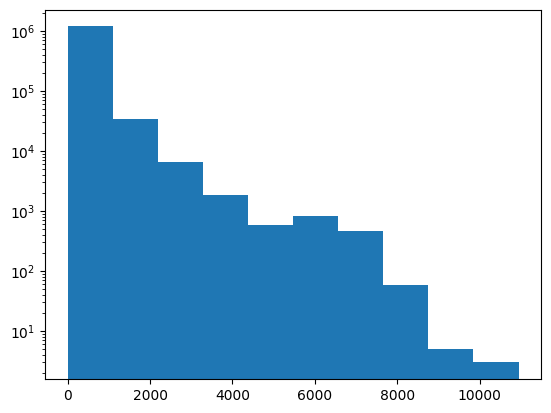

In [6]:
plt.hist(X, log=True)

To begin, compute the estimators for the mean and standard deviation;

In [7]:
mean = X.mean()

In [8]:
std = X.std()

## Normal distribution

We will now consider the data follows a normal distribution. We will therefore find the estimators of $\mu$ and $\sigma$ using the Maximum Likelihood Estimators.

**MLE** : The goal of Maximum Likelihood Estimation is to find the values that maximize the likelihood function. To facilitate computation we are actually computing the minimum of the _negative_ log-likelihood function.

As a reminder, in the case of a normal distribution, this function is:
$$ -\frac{1}{2\sigma^2} \left(\sum_{i=1}^{n}x_i-\mu \right)^2 - n\ln \left(\sigma \sqrt{2\pi} \right)$$

Write the negative log-likelihood function.

In [8]:
def log_likelihood_normal(mu, sigma, data):
    n = len(data)
    return -(-n/2 * np.log(2 * np.pi) - n * np.log(sigma) - (1/(2 * sigma**2)) * np.sum((data - mu)**2))

In [10]:
mean

179.72038733044272

We could now use this function to find its minimal value, let's plot the function for different values of $\hat\mu$ and $\hat\sigma$. We also represent the estimation of the mean and standard deviation we computed earlier.

In [9]:
mu_t = np.linspace(100, 300, 11)
sig_t = np.linspace(300, 500, 11)

res = np.empty((11, 11))
for i, m in enumerate(mu_t):
    for j, s in enumerate(sig_t):
        res[i, j] = log_likelihood_normal(m, s, X)

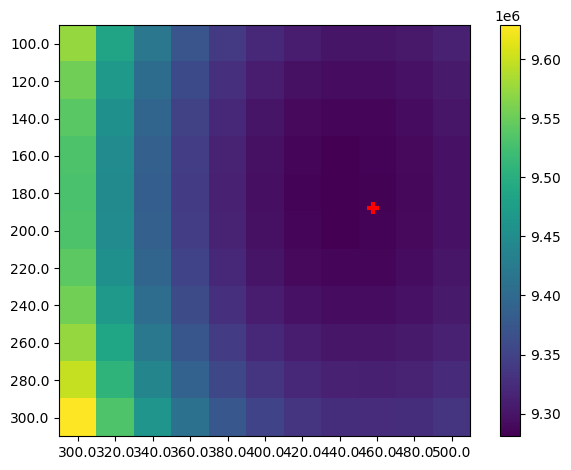

In [10]:
fig, ax = plt.subplots()
im = ax.imshow(res)
ax.figure.colorbar(im)
ax.set_yticks(range(len(mu_t)), labels=mu_t)
ax.set_xticks(range(len(sig_t)), labels=sig_t)
ax.plot((std - sig_t.min()) / sig_t.ptp() * len(sig_t), (mean - mu_t.min()) / mu_t.ptp() * len(mu_t), 'r+', mew=3, ms=9 )
fig.tight_layout()

What do you notice ?

The values maximizing the likelihood are the estimator for the mean and standard deviation. It's no suprise since that's the values we find when computing the derivative of the likelihood.

## Exponential distribution

We will now consider the data follows an exponential distribution. Repeat the process and find the value of the estimator of the parameter $\lambda$ using MLE.

As a reminder: $$ X \sim \text{Exp}(\lambda), \qquad \mathbb{P}(X \in A) = \int_A \lambda e ^{-\lambda x} dx$$

In [11]:
def log_likelihood_exp(lambda_, data):
    n = len(data)
    return -(n * np.log(lambda_) - lambda_ * np.sum(data))

In [12]:
res_0 = np.empty(11)
lmd = np.linspace(0.001, 0.01, 11)
for i, l in enumerate(lmd):
        res_0[i] = log_likelihood_exp(l, X)

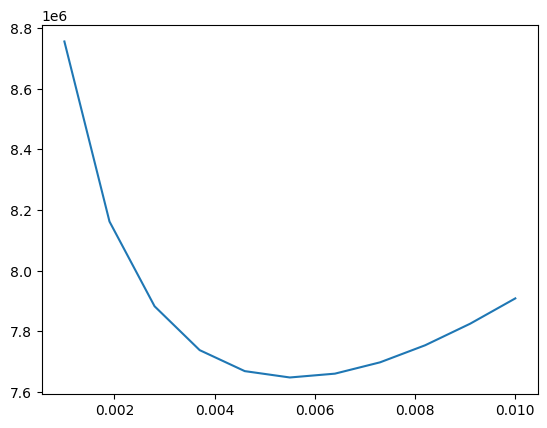

In [13]:
plt.plot(lmd, res_0)

In [14]:
lmbd = 0.005649717514124294

Finally, let's compare the two distributions

(1e-30, 0.01)

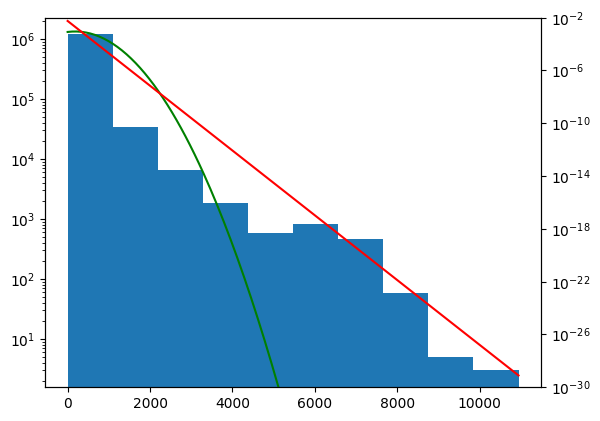

In [15]:
fig, ax = plt.subplots()
plt.hist(df['Nombre de Descentes'], log=True)
x = np.linspace(np.min(df['Nombre de Descentes']), np.max(df['Nombre de Descentes']), 200)
normal = norm(mean, std)
exp = expon(0, 1 / lmbd)
ax2 = ax.twinx()
ax2.plot(x, normal.pdf(x), color='green')
ax2.plot(x, exp.pdf(x), color='red')
ax2.set_yscale('log')
ax2.set_ylim(bottom=1E-30, top=0.01)

What can you conclude ?

The exponential distribution seems to better represent the distribution of our data.